<div style="text-align: right">INFO 7390 ADVANCES DATA SCI/ARCHITECTURE </div> 
<div style="text-align: right">Manisha Bagora -002199292 </div>


## k-means clustering

Defination:k-means clustering is an unsupervised, iterative, and prototype-based clustering method where all data points are partition into k number of clusters, each of which is represented by its centroids (prototype). The centroid of a cluster is often a mean of all data points in that cluster. k-means is a partitioning clustering algorithm and works well with spherical-shaped clusters.

Steps involved in k-means clustering algorithm,

1) Choose the k number of clusters and determine their centroids
2) Assign each data point to its nearest centroid using distance measures
3) Recalculate the new centroids and again assign each data point to its nearest centroid
4) Repeat step 3 and 4 until centroids do not change or no change in criterion function 

## Importing the required Libraries

In [59]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## Reading the data and look at the first five rows

In [60]:
data = pd.read_csv("C:\\Users\Manisha Bagora\\data\\data.csv")
data.head()


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001013   Male     Yes          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             3000                0.0        66.0             360.0   
2             2583             2358.0       120.0             360.0   
3             6000                0.0       141.0             360.0   
4             2333             1516.0        95.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Rural           N  
1             1.0         Urban           Y  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

## Data Exploratory Analysis

In [61]:
print(data.shape) ## to know the total rows and columns in the dataset

(381, 13)


In [62]:
data.info() # # overall info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


## Data Pre-processing

'''The K-means clustering algorithm has a few key assumptions about the data: 
(1) data is not skewed, 
(2) features have the same mean and, 
(3) features have the same variance'''
 it seems the means and standard deviations are so different. So, we need to transform the data to meet the requirements

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


<AxesSubplot:xlabel='Percent missing', ylabel='Feature'>

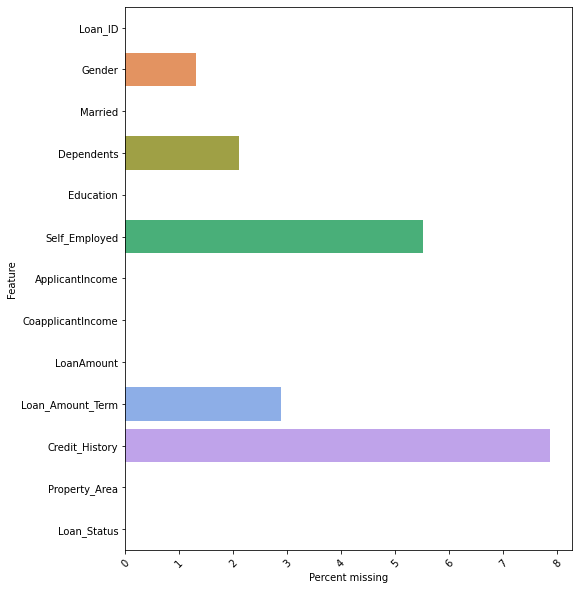

In [64]:
'''Calculate percentage null values for each column or feature'''

null_vals = data.isnull().sum()/len(data)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,10))
plt.xticks(rotation=45)
sns.barplot(x = "Percent missing",y ="Feature",data = null_vals,orient = "h")

In [65]:
#Here we can see any null value columns, drop them
#Drop redundant columns
data.drop(['Self_Employed','Loan_Amount_Term','Credit_History','Dependents','Gender'], axis=1, inplace=True)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Married            381 non-null    object 
 2   Education          381 non-null    object 
 3   ApplicantIncome    381 non-null    int64  
 4   CoapplicantIncome  381 non-null    float64
 5   LoanAmount         381 non-null    float64
 6   Property_Area      381 non-null    object 
 7   Loan_Status        381 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 23.9+ KB


In [67]:
df = pd.DataFrame(data)
  
# select two columns
df1=df[['ApplicantIncome', 'LoanAmount']]

In [68]:
from sklearn.preprocessing import StandardScaler
'''Do scaling to make sure all dimensions have equal mean and variance'''
scaler = StandardScaler() 
scaler.fit(df1)
data_Final = pd.DataFrame(scaler.transform(df1))
data_Final.columns = df1.columns
data_Final.describe()

ApplicantIncome    LoanAmount
count     3.810000e+02  3.810000e+02
mean      9.994921e-17 -9.179009e-17
std       1.001315e+00  1.001315e+00
min      -2.418877e+00 -3.389221e+00
25%      -6.910297e-01 -5.291748e-01
50%      -1.740860e-01  1.770094e-01
75%       4.994218e-01  7.772660e-01
max       4.318317e+00  1.589378e+00

In [69]:
df1.nunique()


ApplicantIncome    322
LoanAmount         101
dtype: int64

#Let us look at the observations in the dataset. We will use the Cluster column to show the different groups that are present in the dataset. Our aim will be to see if the application of the algorithm reproduces closely the groupings.

## Visualize the data points

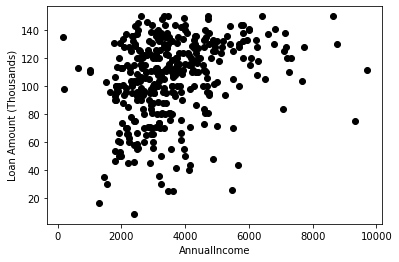

In [70]:
X = df1[["LoanAmount","ApplicantIncome"]] ## here we have taken two columns Loanamount and ApplicantIncome to visualize
#Visualise data points
plt.scatter(df1["ApplicantIncome"],df1["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (Thousands)')
plt.show()

Steps 1 and 2 of K-Means were almost choosing the number of clusters (k) and selecting arbitrary centroids for each cluster. We'll choose 3 clusters and after that select arbitrary perceptions from the information as the centroids:

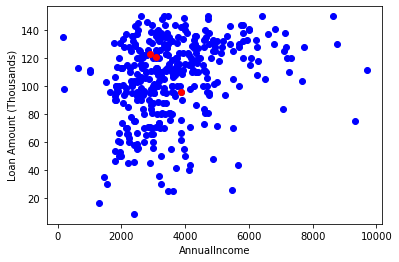

In [71]:

# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (df1.sample(n=K))
plt.scatter(df1["ApplicantIncome"],df1["LoanAmount"],c='Blue')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (Thousands)')
plt.show()

From tha above plot we can observe, the red dots represent the 3 centroids for each cluster. Note that we have chosen these points randomly and hence every time we run this code, we might get different centroids.
# Step III - Assign all the points to the closest cluster centroid
# Step IV - Recompute centroids of newly formed clusters
# Step V - Repeat step 3 and 4

In [72]:
abc = 1
j=0

while(abc!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        abc=1
        j=j+1
    else:
        abc = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(abc.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

522.6764339007034
386.82858083210584
221.32616011420515
207.02731030932063
277.68763984371935
244.66095351174067
229.06905235705375
218.24897861156342
107.07928213052429
52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


These values might shift each time we run this. Here, we are halting the preparing when the centroids are not changing after two cycles. We have at first characterized the diff as 1 and interior the whereas circle, we are calculating this diff as the distinction between the centroids within the past emphasis and the current iteration. When this distinction is 0, we are halting the preparing. Let’s presently visualize the clusters we have got:

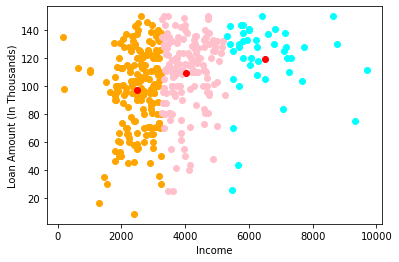

In [73]:
color=['Orange','pink','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

Here, we are able clearly visualize three clusters. The red dots speak to the centroid of each cluster.

In [74]:
#As we are able see the three bunches have been gotten. In this specific case the information is such that the refinement between the bunches is clear.

 We can use a screen plot to help us with the error minimisation by looking at running the algorithm with a sequence  and look for the “elbow” in the plot indicating a good number of clusters to use:

## K-means clustering

In [75]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=2, random_state=1)

In [76]:
'''Let's see how this works:
Apply k-means on the preprocessed data and get cluster labels for each row'''

k_means.fit(data_Final)
clus_labels = k_means.labels_

In [77]:
'''Get cluster characteristics. Since we are interested in the original values,
we use the non-log transformed, non-standardized dataframe'''

df5_clus2 = data_Final.assign(Cluster = clus_labels)
print(data_Final.shape)
df5_clus2.head(2)
df5_clus2

(381, 2)


ApplicantIncome  LoanAmount  Cluster
0           0.707469    0.812575        1
1          -0.408932   -1.376596        0
2          -0.703019    0.530102        1
3           1.706799    1.271595        1
4          -0.879330   -0.352629        0
..               ...         ...      ...
376         1.497342    0.812575        1
377        -0.245316    0.106391        1
378        -0.479457   -1.200050        0
379         0.371067   -2.294635        0
380         0.707469    0.989121        1

[381 rows x 3 columns]

In [78]:
'''1. Elbow method'''

# Fit KMeans and calculate SSE for each *k*
ss_error = {}
for k in range(1, 20):
    k_means = KMeans(n_clusters=k, random_state=1)
    k_means.fit(data_Final)
    ss_error[k] = k_means.inertia_

<AxesSubplot:title={'center':'Elbow plot'}, xlabel='Value of k', ylabel='Sum of squared error'>

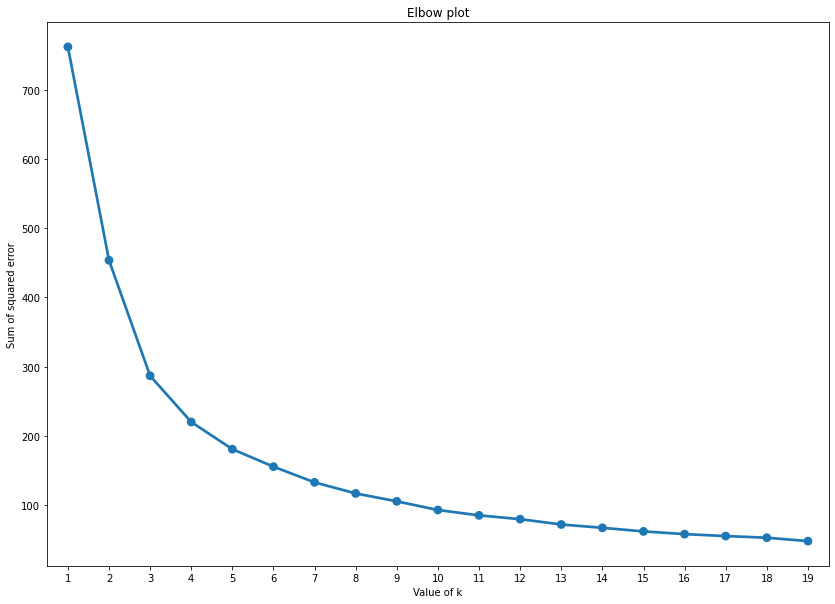

In [79]:
# Make elbow plot
plt.figure(figsize = (14,10))
plt.title('Elbow plot')
plt.xlabel('Value of k')
plt.ylabel('Sum of squared error')
sns.pointplot(x=list(ss_error.keys()), y=list(ss_error.values()))

##  K-Means Clustering:Using Function

In [80]:

X = data_Final.values

Calculate WCSS(Within Cluster Sum of Squares) 

In [81]:
def find_expense(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
    sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
  return sum

## Implement K-Means

In [82]:
import random
def kmeans(X, k):
  
  diff = 1
  cluster = np.zeros(X.shape[0])

  # select k random centroids
  random_indices = np.random.choice(len(X), size=k, replace=False)
  centroids = X[random_indices, :]

  while diff:

    # for each observation
    for i, row in enumerate(X):

      mn_dist = float('inf')
      # dist of the point from all centroids
      for idx, centroid in enumerate(centroids):
        d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)

        # store closest centroid 
        if mn_dist > d:
          mn_dist = d
          cluster[i] = idx

    new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values

    # if centroids are same then leave
    if np.count_nonzero(centroids-new_centroids) == 0:
      diff = 0
    else:
      centroids = new_centroids
  return centroids, cluster  

## Now we will find K Value using "Elbow Method"

In [83]:
cost_list = []

for k in range(1, 10):
  
  centroids, cluster = kmeans(X, k)
  
  # WCSS (Within cluster sum of square)
  cost = find_expense(X, centroids, cluster)
  cost_list.append(cost)


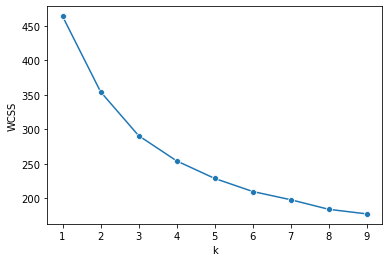

In [84]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

WCSS doesn't reduces much after k=4, so make 4 clusters

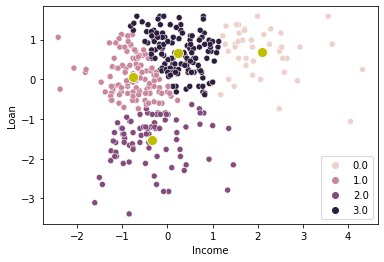

In [85]:
k = 4
centroids, cluster = kmeans(X, k)
sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')

plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()

## Silhouette analysis

In [86]:
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.cm as cm
'''2. Silhoutte method.
Looks like k = 2 is a good solution. But always, explore other values of K around the elbow.
Finally disucss several solutions with stakeholders to see which makes most sense !
Here, we also use Silhoutte plots and scores'''

# Number of clusters confirmation by silhoutte scores
range_n_clusters = [2, 3, 4, 5, 6,7,8,10,12,14]
for n_clusters in range_n_clusters:
  

    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
   
    # The (n_clusters+1)*10 is for inserting blank space between silhouette

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10,)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    

For n_clusters = 2 The average silhouette_score is : 0.37354624047109175
For n_clusters = 3 The average silhouette_score is : 0.39400089972042956
For n_clusters = 4 The average silhouette_score is : 0.3571172813383019
For n_clusters = 5 The average silhouette_score is : 0.36042310363542734
For n_clusters = 6 The average silhouette_score is : 0.3652436305532747
For n_clusters = 7 The average silhouette_score is : 0.3616033026763957
For n_clusters = 8 The average silhouette_score is : 0.36085232669902617
For n_clusters = 10 The average silhouette_score is : 0.3522375286507976
For n_clusters = 12 The average silhouette_score is : 0.3649010380807755
For n_clusters = 14 The average silhouette_score is : 0.3596374039786748


## From the above Silhouette analysis its Looks like k = 3 has the best Silhoutte score. 


## Thank you!!!